In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mean1 = np.array([5,5])
cov1 = np.array([[1,0],[0,1]])
class1 = np.random.multivariate_normal(mean1, cov1, 200)

In [3]:
mean2 = np.array([8,8])
cov2 = np.array([[1,0],[0,1]])
class2 = np.random.multivariate_normal(mean2, cov2, 200)

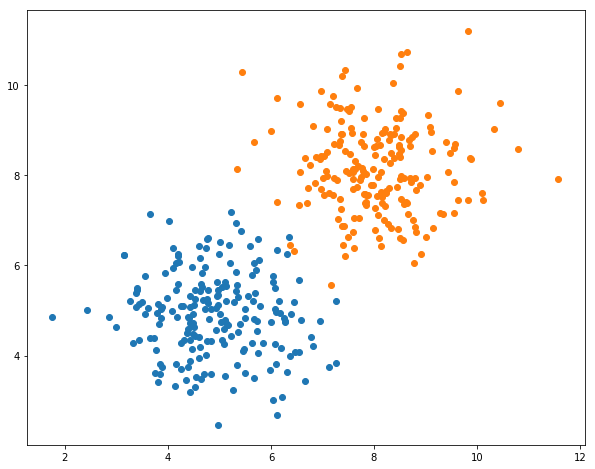

In [4]:
plt.figure(figsize=(10,8))
plt.scatter(class1[:,0], class1[:,1])
plt.scatter(class2[:,0], class2[:,1])
plt.show()

In [5]:
data_X = np.append(class1, class2, axis=0)
data_Y = np.append(np.zeros(200), np.ones(200))

In [6]:
import tensorflow as tf

In [7]:
X = tf.placeholder(dtype=np.float32)
Y = tf.placeholder(dtype=np.float32)

m = tf.Variable(5+tf.random_normal(shape=[2,1]))
b = tf.Variable(tf.random_normal(shape=[1,1]))

#hypothesis
z = tf.matmul(X,m)+b

#cost
loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=z, labels=Y))

#optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(loss)

#initializer
init = tf.global_variables_initializer()

W0903 11:42:42.196828  1644 deprecation.py:323] From C:\Users\hp\Anaconda3\lib\site-packages\tensorflow\python\ops\nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [8]:
#EXECUTION OF GRAPH

n_epochs = 100

with tf.Session() as sess:
    
    #Initialize Variables
    sess.run(init)
    
    for i in range(n_epochs):
        train_e, loss_e, m_e, b_e = sess.run([train,loss,m,b],feed_dict={X:data_X,Y:data_Y})
        print(loss_e)
    print("FINAL", loss_e, m_e, b_e)

37.265694
37.051495
36.837296
36.6231
36.4089
36.194683
35.980457
35.766254
35.55207
35.337864
35.12363
34.909424
34.695225
34.481003
34.266815
34.052593
33.8384
33.624207
33.409985
33.19578
32.98157
32.767357
32.553154
32.338924
32.12475
31.910507
31.6963
31.482098
31.267881
31.053684
30.839476
30.62525
30.411043
30.196863
29.982653
29.768435
29.554228
29.34002
29.125813
28.911606
28.697384
28.483185
28.268982
28.054762
27.840557
27.626335
27.41213
27.197926
26.983734
26.769512
26.5553
26.341082
26.12687
25.91266
25.698467
25.484262
25.270042
25.055832
24.84163
24.627419
24.41322
24.199
23.984781
23.77059
23.556376
23.342167
23.127966
22.913744
22.699541
22.485346
22.271103
22.056913
21.842705
21.628496
21.414278
21.200079
20.985863
20.771652
20.557451
20.34324
20.129038
19.914818
19.700615
19.486416
19.272203
19.057995
18.843771
18.629566
18.415356
18.201153
17.986929
17.772726
17.558512
17.344318
17.130096
16.915886
16.701681
16.487473
16.273272
16.059055
FINAL 16.059055 [[2.1899166

In [9]:
m_e, b_e

(array([[2.1899166],
        [2.619773 ]], dtype=float32), array([[0.3786873]], dtype=float32))

C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


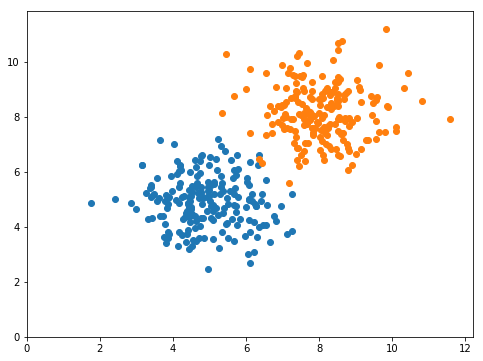

In [10]:
#PLOTTING DECISION BOUNDARY

x = np.linspace(0, 10.0, 100)
y = np.linspace(0, 10.0, 100)
Xp, Yp = np.meshgrid(x,y)
F = Xp*m_e[0] + Yp*m_e[1] + b_e

plt.figure(figsize=(8,6))
plt.contour(Xp,Yp,F,[0])

plt.scatter(class1[:,0], class1[:,1])
plt.scatter(class2[:,0], class2[:,1])

plt.show()